# Part A.

In a study of memory processes, animals were tested in a one-trial avoidance-learning task. The animals were presented with a fear-producing stimulus on the learning trial as soon as they stepped across a line in the test chamber. The dependent variable was the time it took them to step across the line on the test trial. Three groups of animals differed in terms of the area in which they had electrodes implanted in their cortex (Neutral site, Area A, or Area B). Each group was further divided and given electrical stimulation 50, 100, or 150 milliseconds after crossing the line and being presented with the fear-inducing stimulus. If the brain area that was stimulated is involved in memory, stimulation would be expected to interfere with memory consolidation and retard learning of the avoidance response, and the animal should not show any hesitancy in recrossing the line. The data on latency to recross the line are as follows:

<img src="files/p9.png" width="600"/>

The data are found in https://github.com/amanirad/Statistics-in-Cognitive-Sciences.

- Run the Run the appropriate analysis of variance and state your conclusions and interpret the results.
- Use the Bonferroni test to compare the neutral site to each of the other areas, ignoring the length of stimulation. 
- Use simple effects to examine the effect of delay of stimulation in area A for the data.

In [645]:
data = read.table('project_5.dat', header = TRUE)

In [646]:
data

Area,Duration,Time
<int>,<int>,<int>
1,1,25
1,1,30
1,1,28
1,1,40
1,1,20
1,2,30
1,2,25
1,2,27
1,2,35


In [647]:
library(stringr)
data$Area <- str_replace(data$Area, "1", "N")
data$Area <- str_replace(data$Area, "2", "A")
data$Area <- str_replace(data$Area, "3", "B")

data$Duration <- str_replace(data$Duration, "1", "50")
data$Duration <- str_replace(data$Duration, "2", "100")
data$Duration <- str_replace(data$Duration, "3", "150")
data

Area,Duration,Time
<chr>,<chr>,<int>
N,50,25
N,50,30
N,50,28
N,50,40
N,50,20
N,100,30
N,100,25
N,100,27
N,100,35


In [451]:
library(magrittr)
library(rstatix)

In [648]:
data %>% group_by(Area,Duration) %>% get_summary_stats(Time)

Area,Duration,variable,n,min,max,median,q1,q3,iqr,mad,mean,sd,se,ci
<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,100,Time,5,19,31,22,20,23,3,2.965,23.0,4.743,2.121,5.890
A,150,Time,5,21,35,27,23,28,5,5.930,26.8,5.404,2.417,6.710
A,50,Time,5,11,26,15,14,18,4,4.448,16.8,5.718,2.557,7.100
B,100,Time,5,9,24,16,13,18,5,4.448,16.0,5.612,2.510,6.969
B,150,Time,5,21,30,28,23,30,7,2.965,26.4,4.159,1.860,5.164
B,50,Time,5,18,30,23,23,28,5,7.413,24.4,4.722,2.112,5.863
N,100,Time,5,23,35,27,25,30,5,4.448,28.0,4.690,2.098,5.824
N,150,Time,5,20,35,28,26,31,5,4.448,28.0,5.612,2.510,6.969
N,50,Time,5,20,40,28,25,30,5,4.448,28.6,7.403,3.311,9.192


In [453]:
library(ggpubr)

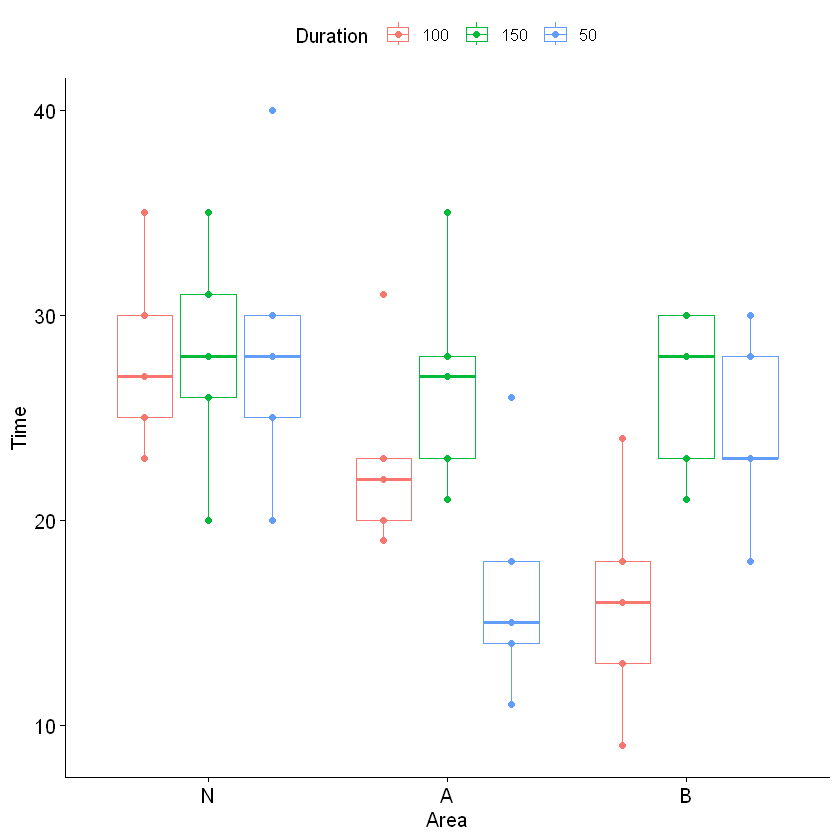

In [649]:
ggboxplot(data, x="Area", y="Time", color="Duration",add="point")

In [650]:
data %>% group_by(Area,Duration) %>% identify_outliers(Time)

Area,Duration,Time,is.outlier,is.extreme
<chr>,<chr>,<int>,<lgl>,<lgl>
A,100,31,TRUE,FALSE
A,50,26,TRUE,FALSE
N,50,40,TRUE,FALSE


از ان جایی که آوتلایر بسیار پرتی نداریم موردی را حذف نمی کنیم

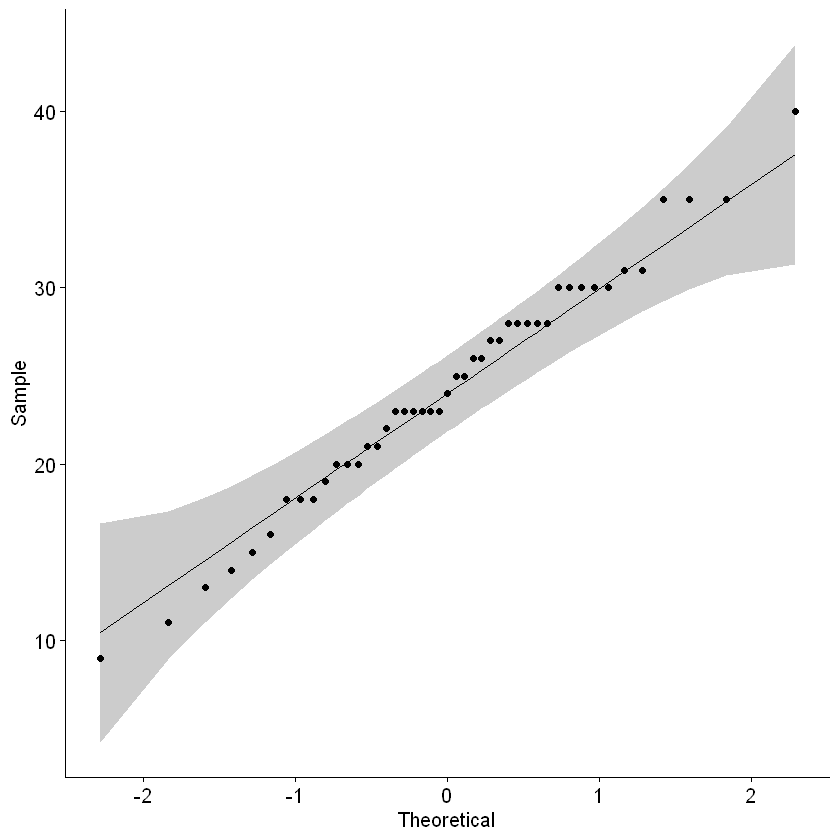

In [651]:
ggqqplot(data,"Time")

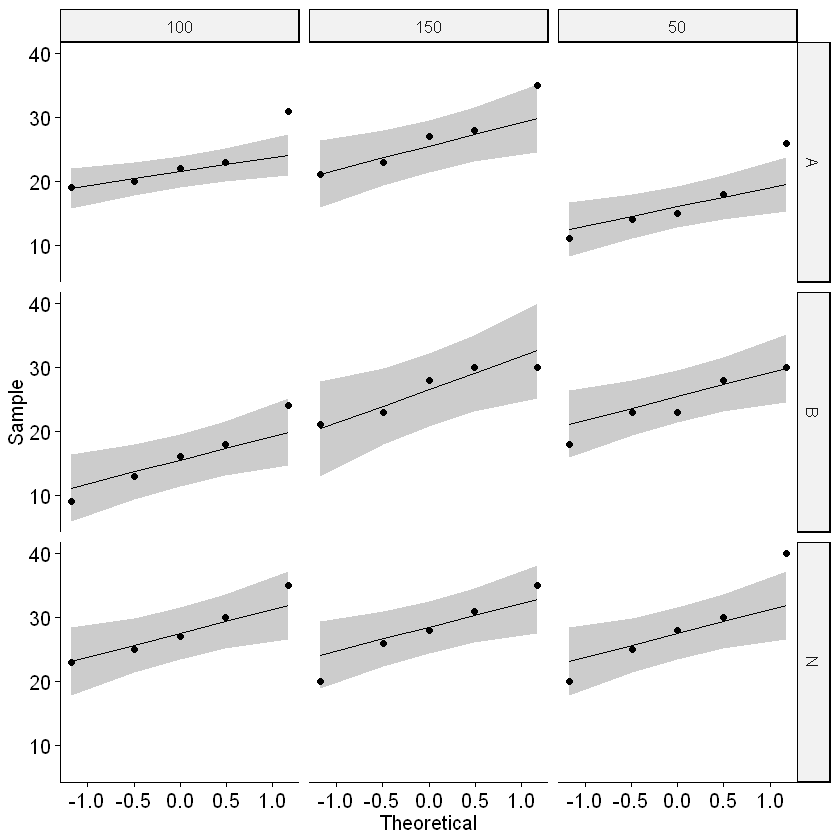

In [72]:
ggqqplot(data, "Time") + facet_grid(Area ~ Duration)

همانطور که از باکسپلاتها برمیآید اوزیع تقریبا نرمال ست

In [652]:
data %>% group_by(Area,Duration) %>% shapiro_test(Time)

Area,Duration,variable,statistic,p
<chr>,<chr>,<chr>,<dbl>,<dbl>
A,100,Time,0.8409519,0.1675703
A,150,Time,0.9460349,0.7088551
A,50,Time,0.9141809,0.4931178
B,100,Time,0.9913625,0.9842414
B,150,Time,0.8504109,0.1958209
B,50,Time,0.9452666,0.7033700
N,100,Time,0.9581566,0.7950916
N,150,Time,0.9913625,0.9842414
N,50,Time,0.9591148,0.8018062


نرمالیتی با توجه به بزرگ بودن پی برقرار است

In [74]:
data %>% levene_test(Time ~ Duration*Area)

df1,df2,statistic,p
<int>,<int>,<dbl>,<dbl>
8,36,0.1355422,0.9970647


همگنی واریانس ها برقرار است

In [653]:
data %>% anova_test(Time ~ Duration*Area)

,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,Duration,2,36,3.217,0.052,,0.152
2,Area,2,36,6.074,0.005,*,0.252
3,Duration:Area,4,36,3.172,0.025,*,0.261


از آنجایی که فرض صفر ما برابر بودن میانگین زمان به ازای طول زمانی و ناحیه تحریکی است، و تعداد متغیرها بیش از دو تاست (9 حالت) از آنوای two-way استفاده می کنیم
می بینیم که مدت زمان تحریک به تنهایی تفاوتی ایجاد نمی کند اما ناحیه تحریک و ترکیب تاثیر ناحیه و مدت زمان باعث ایجاد تفاوت می شود.

## Post-hoc tests

In [656]:
data %>% group_by(Duration) %>% anova_test(Time ~ Area) %>% adjust_pvalue(method="bonferroni")

Duration,Effect,DFn,DFd,F,p,p<.05,ges,p.adj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
100,Area,2,12,7.171,0.009,*,0.544,0.027
150,Area,2,12,0.133,0.876,,0.022,1.000
50,Area,2,12,4.887,0.028,*,0.449,0.084


In [459]:
pwc1 = data %>% group_by(Duration) %>% emmeans_test(Time ~ Area, p.adjust.method = "bonferroni")
pwc1

,Duration,term,.y.,group1,group2,df,statistic,p,p.adj,p.adj.signif
,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,100,Area,Time,A,B,36,2.0443342,0.048287184,0.144861551,ns
2,100,Area,Time,A,N,36,-1.4602387,0.152897216,0.458691648,ns
3,100,Area,Time,B,N,36,-3.5045730,0.001243002,0.003729006,**
4,150,Area,Time,A,B,36,0.1168191,0.907652697,1.000000000,ns
5,150,Area,Time,A,N,36,-0.3504573,0.728037926,1.000000000,ns
6,150,Area,Time,B,N,36,-0.4672764,0.643118245,1.000000000,ns
7,50,Area,Time,A,B,36,-2.2195629,0.032836378,0.098509134,ns
8,50,Area,Time,A,N,36,-3.4461634,0.001462476,0.004387428,**
9,50,Area,Time,B,N,36,-1.2266005,0.227935062,0.683805185,ns


. از این داده ها برمی آید که در بازه زمانی 100 اختلاف مشهودی بین منطقه بی و خنثی دیده می شود و در بازه زمانی 50 اختلاف مشهودی در منطقه آ و خنثی داریم در دیگر حالات نفاوت مشهودی دیده نمیشود

In [657]:
data %>% group_by(Area) %>% anova_test(Time ~ Duration) %>% adjust_pvalue(method="bonferroni")

Area,Effect,DFn,DFd,F,p,p<.05,ges,p.adj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
A,Duration,2,12,4.528,0.034,*,0.430,0.102
B,Duration,2,12,6.425,0.013,*,0.517,0.039
N,Duration,2,12,0.017,0.984,,0.003,1.000


In [658]:
pwc = data %>% group_by(Area) %>% emmeans_test(Time ~ Duration, p.adjust.method = "bonferroni")
pwc

,Area,term,.y.,group1,group2,df,statistic,p,p.adj,p.adj.signif
,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,A,Duration,Time,100,150,36,-1.109781e+00,0.274451549,0.82335465,ns
2,A,Duration,Time,100,50,36,1.810696e+00,0.078540225,0.23562068,ns
3,A,Duration,Time,150,50,36,2.920477e+00,0.005998172,0.01799451,*
4,B,Duration,Time,100,150,36,-3.037297e+00,0.004422238,0.01326671,*
5,B,Duration,Time,100,50,36,-2.453201e+00,0.019133592,0.05740078,ns
6,B,Duration,Time,150,50,36,5.840955e-01,0.562798509,1.00000000,ns
7,N,Duration,Time,100,150,36,6.484763e-16,1.000000000,1.00000000,ns
8,N,Duration,Time,100,50,36,-1.752286e-01,0.861881846,1.00000000,ns
9,N,Duration,Time,150,50,36,-1.752286e-01,0.861881846,1.00000000,ns


  در منطقه آ تفاوت مشهودی بین مدت زمان 50 و 100 و در منطقه بی تفاوت مشهود در مدت  زمان 100 و 150 داریم. بقیه حالات تفاوت محسوسی در زمان پاسخ ندارند  

In [659]:
data %>% group_by(Area) %>% pairwise_t_test(Time ~ Duration, p.adjust.method = "bonferroni")

,Area,.y.,group1,group2,n1,n2,p,p.signif,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>
1,A,Time,100,150,5,5,0.27900,ns,0.8380,ns
2,A,Time,100,50,5,5,0.08940,ns,0.2680,ns
3,A,Time,150,50,5,5,0.01150,*,0.0344,*
4,B,Time,100,150,5,5,0.00549,**,0.0165,*
5,B,Time,100,50,5,5,0.01830,*,0.0550,ns
6,B,Time,150,50,5,5,0.52800,ns,1.0000,ns
7,N,Time,100,150,5,5,1.00000,ns,1.0000,ns
8,N,Time,100,50,5,5,0.87700,ns,1.0000,ns
9,N,Time,150,50,5,5,0.87700,ns,1.0000,ns


نتیجه به دست امده از تی تست جفتی با نتیجه ایمینز تست یکسان است

In [660]:
b = ggboxplot(data, x="Area", y="Time",color="Duration")

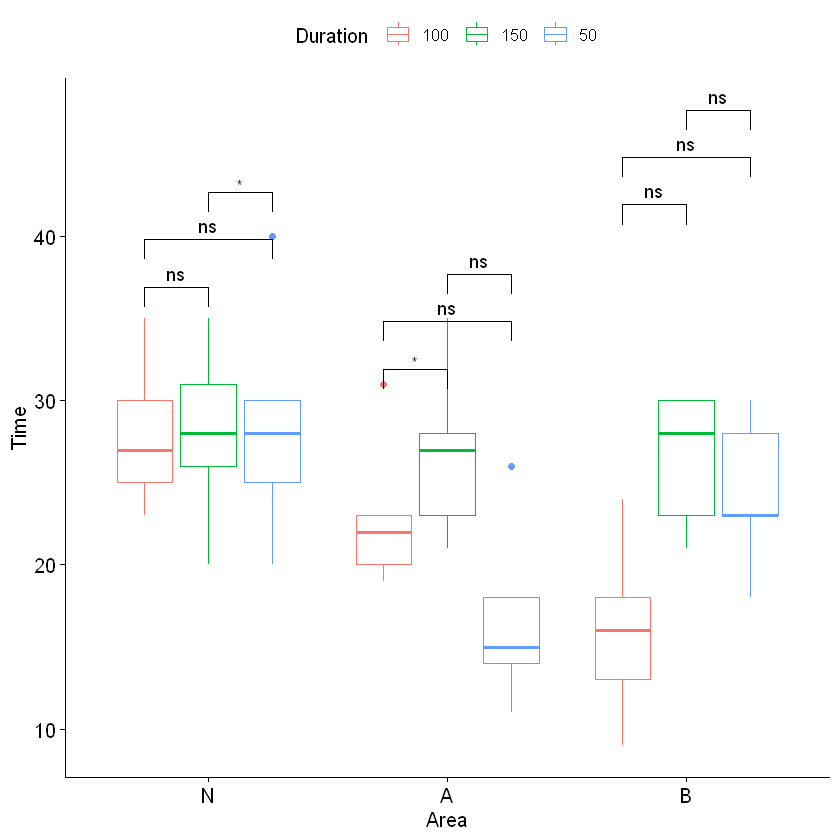

In [661]:
pwc = pwc %>% add_xy_position(x="Area")
b + stat_pvalue_manual(pwc)

تفاوتها روی نمودار قابل مشاهده ست

In [662]:
pwcA = data %>% emmeans_test(Time ~ Area, p.adjust.method = "bonferroni")
pwcA

,term,.y.,group1,group2,df,statistic,p,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Area,Time,A,B,42,-0.02943603,0.97665627,1.00000000,ns
2,Area,Time,A,N,42,-2.64924233,0.01132008,0.03396023,*
3,Area,Time,B,N,42,-2.61980630,0.01219155,0.03657466,*


با در نظر نگرفتن مدت زمانی و اجرای تست براساس منطقه می بینیم که بین منطقه آ و بی تفاوت مشهودی نیست اما بین این مناطق با منطقه خنثی تفاوت قابل توجهی در زمان آزمونه دیده می شود

In [101]:
bA = ggboxplot(data, x="Area", y="Time")

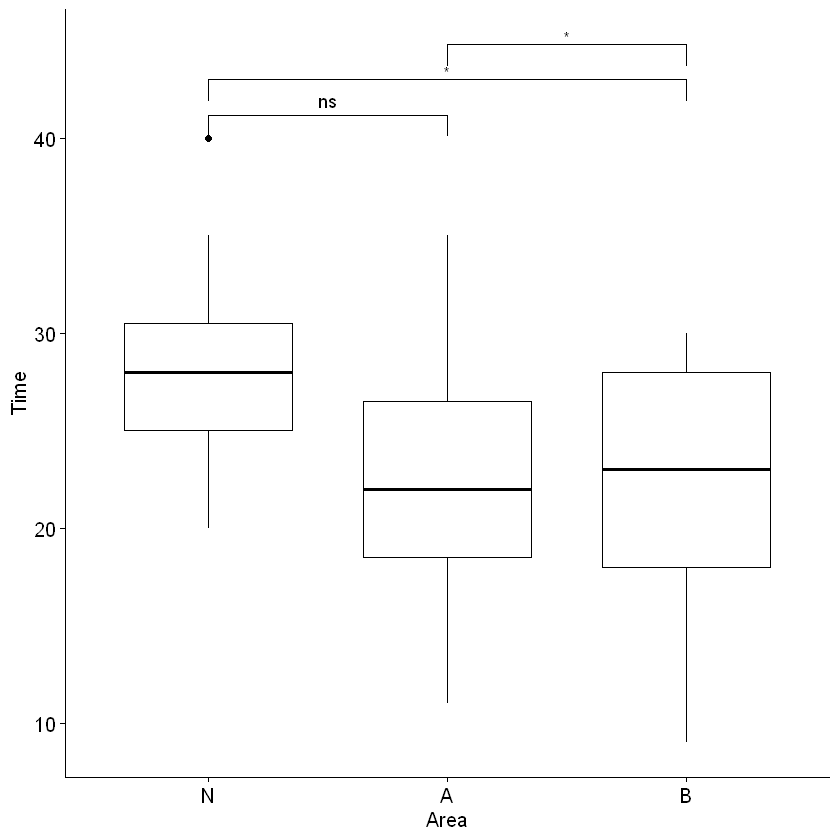

In [102]:
pwcA = pwcA %>% add_xy_position(x="Area")
bA + stat_pvalue_manual(pwcA)

In [90]:
areaA_data <- subset(data, Area == "A")
areaA_data

,Area,Duration,Time
,<chr>,<chr>,<int>
16,A,50,11
17,A,50,18
18,A,50,26
19,A,50,15
20,A,50,14
21,A,100,31
22,A,100,20
23,A,100,22
24,A,100,23


می خواهیم تاثیر مدت زمان تحریک را فقط بر منطقه آ ببینیم پس تنها اطلاعات مربوط به منطقه آ را بررسی میکنیم

In [103]:
areaA_data %>% anova_test(Time ~ Duration)

,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,Duration,2,12,4.528,0.034,*,0.43


In [104]:
pwc_arA = areaA_data %>% emmeans_test(Time ~ Duration, p.adjust.method = "bonferroni")
pwc_arA

,term,.y.,group1,group2,df,statistic,p,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Duration,Time,100,150,12,-1.132773,0.2794359,0.83830783,ns
2,Duration,Time,100,50,12,1.848209,0.0893546,0.26806379,ns
3,Duration,Time,150,50,12,2.980982,0.0114648,0.03439441,*


تفاوت در منطقه آ فقط بین مدت زمان 50 و 100 قابل مشاهده ست در واقع این تاخیر 100 میلی ثانیه ای است که باعث تفاوت معناداری در زمان انجام آزمونه می گردد

In [105]:
b_arA = ggboxplot(data, x="Duration", y="Time")

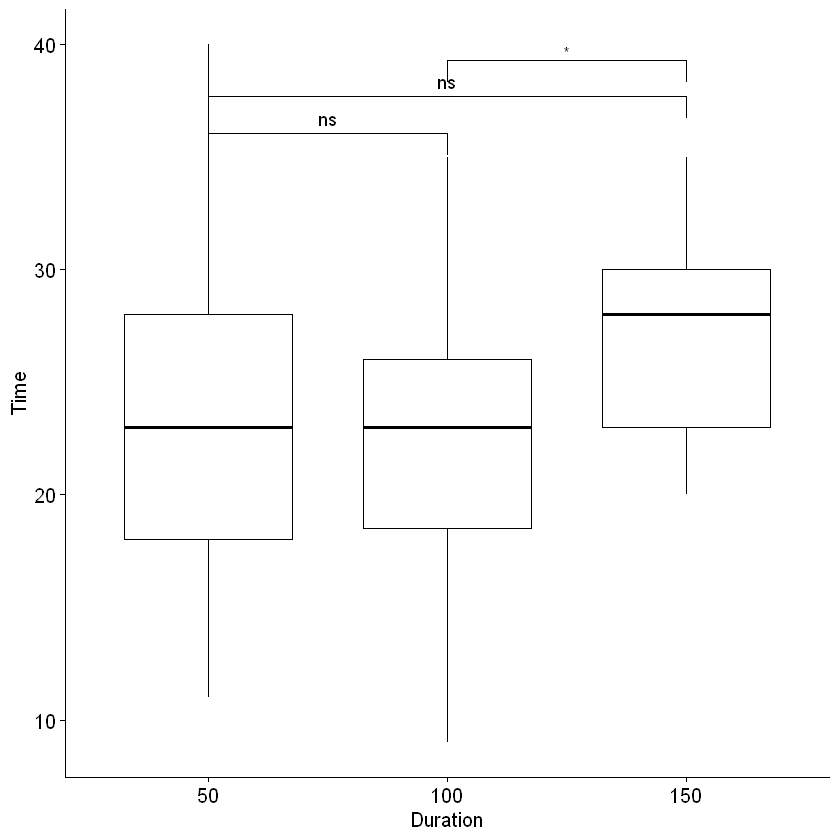

In [106]:
pwc_arA = pwc_arA %>% add_xy_position(x="Duration")
b_arA + stat_pvalue_manual(pwc_arA)

# Part B. 
Three researchers ran a study comparing different treatments for posttraumatic stress disorder (PTSD). They used three groups (plus a waiting list control). One group received Stress Inoculation Therapy (SIT), another received a Prolonged Exposure (PE) treatment, and a third received standard Supportive Counseling (SC). All clients were measured at Pretreatment, Posttreatment, and a 3.5-month Follow-up. The data below closely approximate the data that they collected, and the dependent variable is a measure of PTSD.

<img src="files/p10.png" width="600"/>

- Run a repeated measures analysis of variance on these data. Draw the appropriate conclusions.
- Run a mixed models analysis of variance, specifying an appropriate form for the covariance matrix, and compare the results with those you obtained above.
- The following data come from above data with some observations deleted. (An entry of “999” represents a missing observation.)

<img src="files/p11.png" width="600"/>

    - Analyze these data using a standard repeated measures analysis of variance.
    - How do your results differ from the results you found above.
    - Now analyze the new data using a mixed models approach withan appropriate form for the covariance matrix. How do those results differ from the results you found above?


## make data frame

In [581]:
PTSD_data <- data.frame(
    Therapy = c("SIT", "SIT","SIT", "SIT", "SIT","SIT", "SIT","SIT", "SIT", "SIT", "SIT","SIT","SIT","SIT", "SIT","SIT", "SIT", "SIT", "SIT","SIT","SIT","SIT", "SIT","SIT", "SIT", "SIT", "SIT","SIT","SIT","SIT","SIT","SIT", "SIT", "SIT", "SIT","SIT","SIT","SIT", "SIT","SIT", "SIT", "SIT", "SIT","SIT","SIT",
              "PE", "PE","PE", "PE", "PE","PE", "PE","PE", "PE", "PE", "PE","PE","PE","PE", "PE","PE", "PE", "PE", "PE","PE","PE","PE", "PE","PE", "PE", "PE", "PE","PE","PE","PE","PE","PE", "PE", "PE", "PE","PE","PE","PE", "PE","PE", "PE", "PE", "PE","PE","PE",
                "SC", "SC","SC", "SC", "SC","SC", "SC","SC", "SC", "SC", "SC","SC","SC","SC", "SC","SC", "SC", "SC", "SC","SC","SC","SC", "SC","SC", "SC", "SC", "SC","SC","SC","SC","SC","SC", "SC", "SC", "SC","SC","SC","SC", "SC","SC", "SC", "SC", "SC","SC","SC"
               ),
    Period = c(
                     "Pre", "Pre","Pre", "Pre", "Pre","Pre", "Pre","Pre", "Pre", "Pre","Pre", "Pre","Pre", "Pre", "Pre",
                     "Post","Post","Post","Post","Post","Post","Post","Post","Post","Post","Post","Post","Post","Post","Post",
                     "Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup",
                     "Pre", "Pre","Pre", "Pre", "Pre","Pre", "Pre","Pre", "Pre", "Pre","Pre", "Pre","Pre", "Pre", "Pre",
                     "Post","Post","Post","Post","Post","Post","Post","Post","Post","Post","Post","Post","Post","Post","Post",
                     "Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup",
                     "Pre", "Pre","Pre", "Pre", "Pre","Pre", "Pre","Pre", "Pre", "Pre","Pre", "Pre","Pre", "Pre", "Pre",
                     "Post","Post","Post","Post","Post","Post","Post","Post","Post","Post","Post","Post","Post","Post","Post",
                     "Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup"   
                 ),
    PTSD_M=c(19,28,18,23,21,24,26,15,18,34,20,34,29,33,22,
            6,14,6,6,6,10,10,6,8,13,10,10,16,19,7,
             1,16,8,11,13,8,7,13,6,8,16,1,23,39,16,
             20,21,36,25,26,30,19,19,22,22,24,28,29,27,27,
             5,18,26,11,2,31,6,7,4,17,19,22,23,15,7,
             0,21,17,9,7,10,11,5,4,20,1,16,20,20,3,
             12,27,24,32,26,18,38,26,23,22,34,22,27,23,26,
             14,18,19,21,20,20,35,22,10,19,27,15,18,21,18,
             18,9,13,11,18,26,34,22,8,19,23,12,13,19,13
            ),
    ID=c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,
         1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,
         1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,
         16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,
         16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,
         16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,
         31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,
         31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,
         31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
        )
)

#### Add ID column to data

In [542]:
# PTSD_data$ID <- seq.int(nrow(PTSD_data))

In [582]:
PTSD_data

Therapy,Period,PTSD_M,ID
<chr>,<chr>,<dbl>,<dbl>
SIT,Pre,19,1
SIT,Pre,28,2
SIT,Pre,18,3
SIT,Pre,23,4
SIT,Pre,21,5
SIT,Pre,24,6
SIT,Pre,26,7
SIT,Pre,15,8
SIT,Pre,18,9


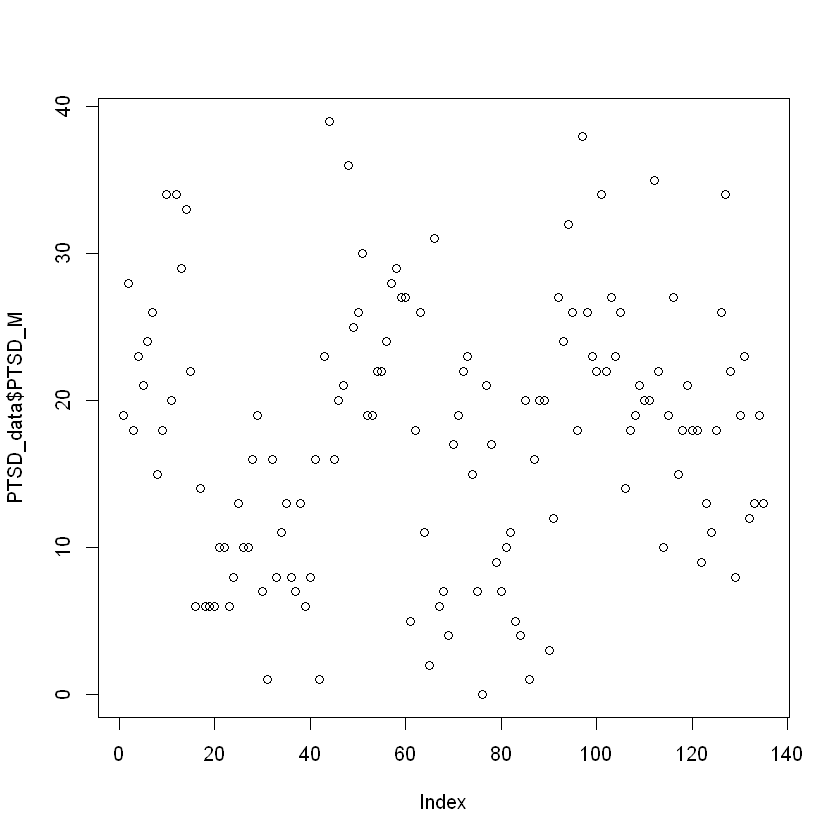

In [583]:
plot(PTSD_data$PTSD_M)

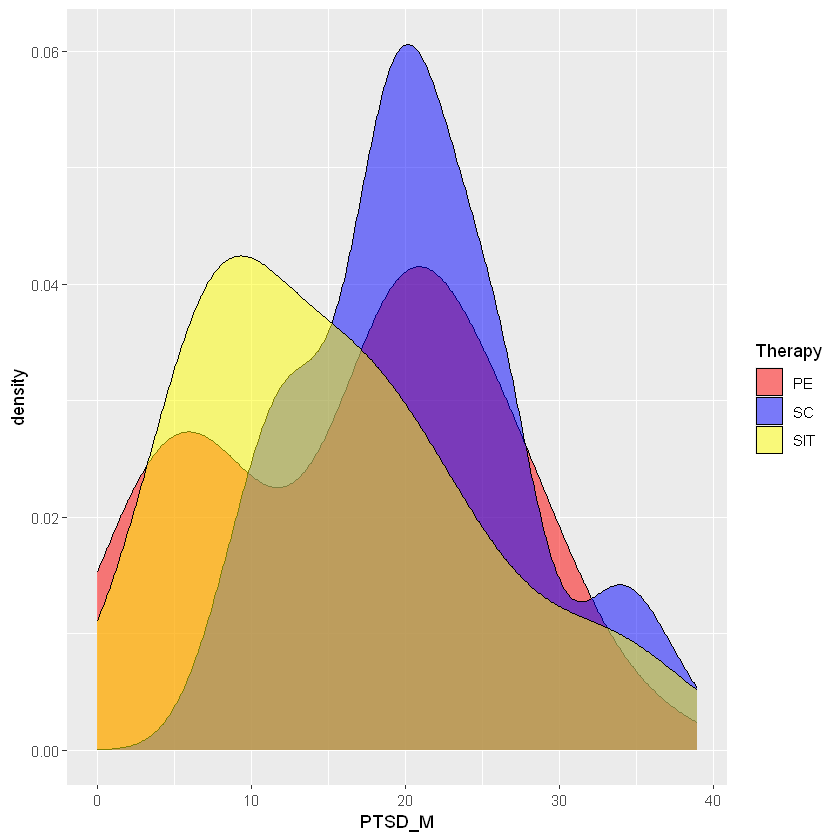

In [584]:
ggplot(PTSD_data %>% group_by(Period), aes(x = PTSD_M, fill = Therapy)) +
  geom_density(alpha = 0.5) +
  scale_fill_manual(values = c("SIT" = "yellow", "PE" = "red","SC"="blue"))

In [585]:
PTSD_data %>% group_by(Therapy,Period) %>% get_summary_stats(PTSD_M)

Therapy,Period,variable,n,min,max,median,q1,q3,iqr,mad,mean,sd,se,ci
<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PE,Followup,PTSD_M,15,0,21,10,4.5,18.5,14.0,10.378,10.933,7.535,1.946,4.173
PE,Post,PTSD_M,15,2,31,15,6.5,20.5,14.0,11.861,14.200,8.962,2.314,4.963
PE,Pre,PTSD_M,15,19,36,25,21.5,27.5,6.0,4.448,25.000,4.721,1.219,2.614
SC,Followup,PTSD_M,15,8,34,18,12.5,20.5,8.0,7.413,17.200,7.043,1.818,3.900
SC,Post,PTSD_M,15,10,35,19,18.0,21.0,3.0,2.965,19.800,5.697,1.471,3.155
SC,Pre,PTSD_M,15,12,38,26,22.5,27.0,4.5,4.448,25.333,6.287,1.623,3.482
SIT,Followup,PTSD_M,15,1,39,11,7.5,16.0,8.5,7.413,12.400,9.448,2.439,5.232
SIT,Post,PTSD_M,15,6,19,10,6.0,11.5,5.5,5.930,9.800,4.092,1.056,2.266
SIT,Pre,PTSD_M,15,15,34,23,19.5,28.5,9.0,7.413,24.267,6.170,1.593,3.417


همانطور که در جدول بالا می توان دید میانگین و میانه معیار سنجش ( به جز در درمان اس آی تی) در سه حالت پیش و پس و فالوآپ بهبود داشته (کمترشده) است. در حالت درمان اس آی تی بهبود بسیار مشهودی هم در میانه هم در میانیگن در حالت پست دیده می شود اما این بهبود در مرحله فالوآپ کاهش می یابد. در مجموع اما می توان دید که در هر سه درمان، بهبود قابل توجهی داشته ایم 

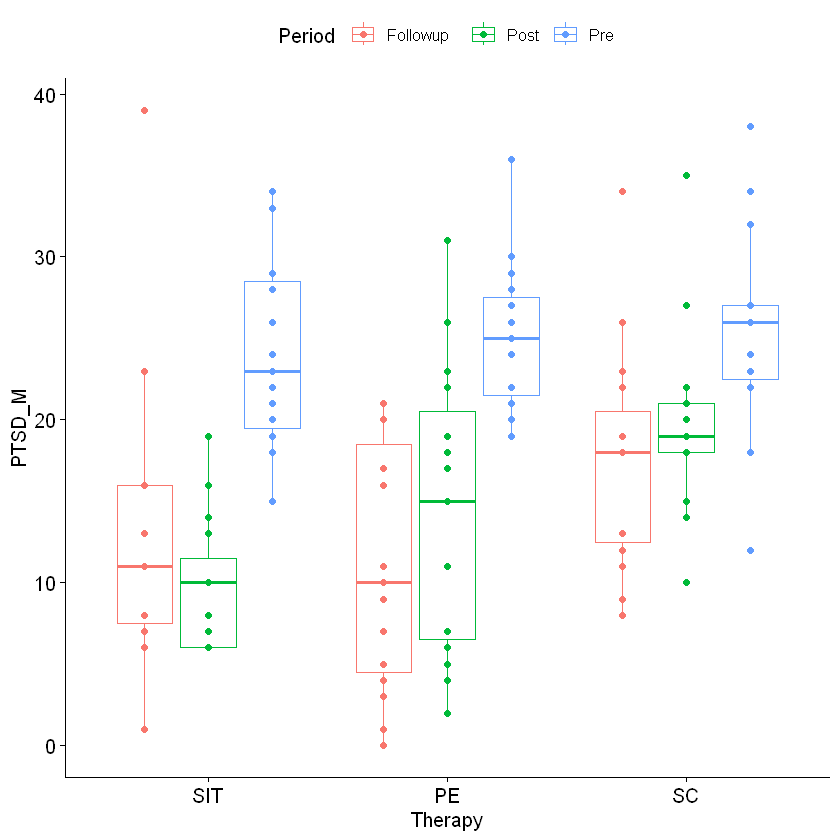

In [586]:
ggboxplot(PTSD_data, x="Therapy", y="PTSD_M", color="Period", add="point")

In [587]:
PTSD_data %>% group_by(Therapy,Period) %>% identify_outliers(PTSD_M)

Therapy,Period,PTSD_M,ID,is.outlier,is.extreme
<chr>,<chr>,<dbl>,<dbl>,<lgl>,<lgl>
SC,Followup,34,37,TRUE,FALSE
SC,Post,35,37,TRUE,TRUE
SC,Post,10,39,TRUE,FALSE
SC,Post,27,41,TRUE,FALSE
SC,Pre,12,31,TRUE,FALSE
SC,Pre,38,37,TRUE,FALSE
SC,Pre,34,41,TRUE,FALSE
SIT,Followup,39,14,TRUE,FALSE


In [588]:
PTSD_data <- PTSD_data[-c(112),]

PTSD_data

,Therapy,Period,PTSD_M,ID
,<chr>,<chr>,<dbl>,<dbl>
1,SIT,Pre,19,1
2,SIT,Pre,28,2
3,SIT,Pre,18,3
4,SIT,Pre,23,4
5,SIT,Pre,21,5
6,SIT,Pre,24,6
7,SIT,Pre,26,7
8,SIT,Pre,15,8
9,SIT,Pre,18,9


 فقط یک مقدار اکستریم داریم پس فقط آن مورد را حذف کردیم

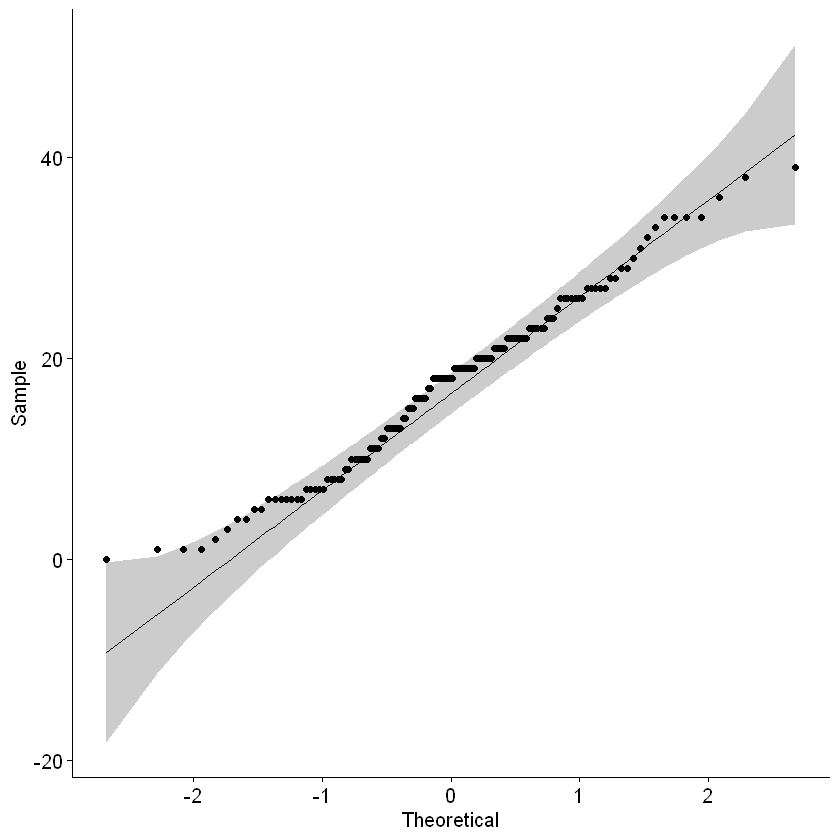

In [589]:
ggqqplot(PTSD_data,"PTSD_M")

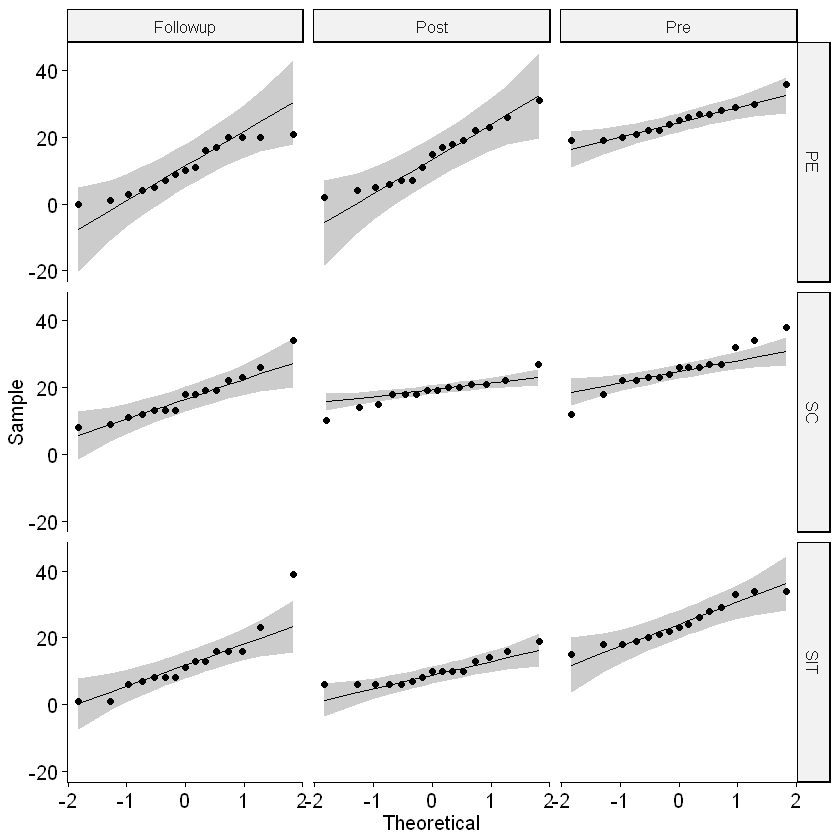

In [590]:
ggqqplot(PTSD_data,"PTSD_M") + facet_grid(Therapy ~ Period)

In [591]:
PTSD_data %>% group_by(Therapy,Period) %>% shapiro_test(PTSD_M)

Therapy,Period,variable,statistic,p
<chr>,<chr>,<chr>,<dbl>,<dbl>
PE,Followup,PTSD_M,0.9066639,0.12036543
PE,Post,PTSD_M,0.9427547,0.41827489
PE,Pre,PTSD_M,0.9433104,0.42582430
SC,Followup,PTSD_M,0.9320402,0.29265792
SC,Post,PTSD_M,0.9461264,0.50233576
SC,Pre,PTSD_M,0.9565449,0.63261887
SIT,Followup,PTSD_M,0.8594653,0.02370838
SIT,Post,PTSD_M,0.8607188,0.02471639
SIT,Pre,PTSD_M,0.9334535,0.30710484


می بینیم که به جز در حالت درمان اس آی تی و در مرحله پست و فالوآپ در همه حالات مقدار پی بزرگتر از 0.05 است و در نتیجه فقط برای آن حالات فرض نرمالیتی برقرار است. اما وجود دو پی کوچک می تواند مارا به سمت آزمونهای ناپارامتریک ببرد. در اینجا بافرض نرمالیتی ادامه تحلیل را پیش میبریم. در غیر این صورت باید سمت آزمونهایی مثل فریدمن برویم 

In [593]:
PTSD_data %>% levene_test(PTSD_M ~ Period*Therapy)

df1,df2,statistic,p
<int>,<int>,<dbl>,<dbl>
8,125,2.37206,0.0206107


نتیجه آزمون لیون از همگن نبودن واریانس ها خبر می دهد که همین امر لزوم استفاده از آزمونهای ناپارامتریک را در پی دارد اما با توجه به درخواست صورت سوال فرض را بر همگن بودن میگیریم

In [597]:
library(rstatix)

In [598]:
model <- PTSD_M ~ Therapy + Period + Therapy:Period

In [599]:

Rm_results = anova_test(data = PTSD_data,dv = PTSD_M, wid = ID, within = c(Period,Therapy),formula = model)
Rm_results


,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,Therapy,2,125,6.297,2.00e-03,*,0.092
2,Period,2,125,39.852,4.09e-14,*,0.389
3,Therapy:Period,4,125,1.820,1.29e-01,,0.055


. با فرض ویدین سابجکت بودن نوع درمان، از آنوای ریپیتد استفاده میکنیم نتایج به دست آمده فرض صفر ما را رد می کند (در نتیجه انواع درمان بر بهبود اختلال پسارخداد تاثیر می گذارد)

In [530]:
summary(Rm_results)

    Effect               DFn             DFd            F         
 Length:3           Min.   :2.000   Min.   :125   Min.   : 1.820  
 Class :character   1st Qu.:2.000   1st Qu.:125   1st Qu.: 4.059  
 Mode  :character   Median :2.000   Median :125   Median : 6.297  
                    Mean   :2.667   Mean   :125   Mean   :15.990  
                    3rd Qu.:3.000   3rd Qu.:125   3rd Qu.:23.075  
                    Max.   :4.000   Max.   :125   Max.   :39.852  
       p              p<.05                ges        
 Min.   :0.00000   Length:3           Min.   :0.0550  
 1st Qu.:0.00100   Class :character   1st Qu.:0.0735  
 Median :0.00200   Mode  :character   Median :0.0920  
 Mean   :0.04367                      Mean   :0.1787  
 3rd Qu.:0.06550                      3rd Qu.:0.2405  
 Max.   :0.12900                      Max.   :0.3890  

## PostHocTests

In [600]:
PTSD_data %>% group_by(Therapy) %>% anova_test(dv = PTSD_M, wid = ID, within = Period,formula = PTSD_M ~ Period ) %>% adjust_pvalue(method="bonferroni")


Therapy,Effect,DFn,DFd,F,p,p<.05,ges,p.adj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
PE,Period,2,42,15.302,1.02e-05,*,0.422,3.06e-05
SC,Period,2,41,7.869,1.00e-03,*,0.277,3.00e-03
SIT,Period,2,42,18.578,1.66e-06,*,0.469,4.98e-06


در هر سه حالت درمان فرض صفر رد می شود و تفاوت در معیار سنجش داریم

In [601]:
library(tidyverse)
library(rstatix)

In [603]:
PTSD_data %>% group_by(Therapy) %>% pairwise_t_test(formula = PTSD_M ~ Period,paired=TRUE, p.adjust.method = "bonferroni")


,Therapy,.y.,group1,group2,n1,n2,p,p.signif,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>
1,PE,PTSD_M,Followup,Post,15,15,2.27e-01,ns,6.80e-01,ns
2,PE,PTSD_M,Followup,Pre,15,15,4.20e-06,****,1.26e-05,****
3,PE,PTSD_M,Post,Pre,15,15,2.11e-04,***,6.32e-04,***
4,SC,PTSD_M,Followup,Post,15,14,4.98e-01,ns,1.00e+00,ns
5,SC,PTSD_M,Followup,Pre,15,15,5.64e-04,***,1.69e-03,**
6,SC,PTSD_M,Post,Pre,14,15,4.70e-03,**,1.41e-02,*
7,SIT,PTSD_M,Followup,Post,15,15,3.10e-01,ns,9.30e-01,ns
8,SIT,PTSD_M,Followup,Pre,15,15,2.90e-05,****,8.69e-05,****
9,SIT,PTSD_M,Post,Pre,15,15,1.01e-06,****,3.04e-06,****


می شود از این داده ها اینطور استنباط کرد در همه درمان ها تفاوت معنا داری بین حالت پست و فالوآپ وجود ندارد اما بین حالات پیش و پست، و پیش و فالوآپ تفاوت معناداری مشاهده می شود

In [549]:
PTSD_data %>% group_by(Period) %>% anova_test(dv = PTSD_M, wid = ID,within = Therapy,formula = PTSD_M ~ Therapy ) %>% adjust_pvalue(method="bonferroni")


Period,Effect,DFn,DFd,F,p,p<.05,ges,p.adj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Followup,Therapy,2,42,2.471,0.097000,,0.105,0.291000
Post,Therapy,2,42,8.728,0.000676,*,0.294,0.002028
Pre,Therapy,2,42,0.134,0.875000,,0.006,1.000000


In [550]:
PTSD_data %>% group_by(Period) %>% pairwise_t_test(PTSD_M ~ Therapy, paired=TRUE,p.adjust.method = "bonferroni" )

,Period,.y.,group1,group2,n1,n2,statistic,df,p,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Followup,PTSD_M,PE,SC,15,15,-2.1640873,14,4.80e-02,0.145000,ns
2,Followup,PTSD_M,PE,SIT,15,15,-0.5815421,14,5.70e-01,1.000000,ns
3,Followup,PTSD_M,SC,SIT,15,15,1.5630556,14,1.40e-01,0.420000,ns
4,Post,PTSD_M,PE,SC,15,15,-2.0252516,14,6.20e-02,0.187000,ns
5,Post,PTSD_M,PE,SIT,15,15,2.0713324,14,5.70e-02,0.172000,ns
6,Post,PTSD_M,SC,SIT,15,15,5.7552609,14,4.98e-05,0.000149,***
7,Pre,PTSD_M,PE,SC,15,15,-0.1524986,14,8.81e-01,1.000000,ns
8,Pre,PTSD_M,PE,SIT,15,15,0.3832364,14,7.07e-01,1.000000,ns
9,Pre,PTSD_M,SC,SIT,15,15,0.4650186,14,6.49e-01,1.000000,ns


به طور کلی تفاوت چشمگیری بین شیوه های درمان دیده نمی شود تنها بین روش درمان اس آی تی و اس سی، در مرحله پست تفاوت مشهودی داریم 

## Run a mixed models analysis of variance, specifying an appropriate form for the covariance matrix, and compare the results with those you obtained above.


In [411]:
Mixed_results = anova_test(data = PTSD_data,dv = PTSD_M, wid = ID, between = Therapy, within = Period,formula = model)
Mixed_results

,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,Therapy,2,118,7.458,8.91e-04,*,0.112
2,Period,2,118,55.148,1.23e-17,*,0.483
3,Therapy:Period,4,118,2.085,8.70e-02,,0.066


نتایج انوای میکس و آنوای ریپیتدد جز در مقدار پی یکسان است

In [412]:
summary(Mixed_results)

    Effect               DFn             DFd            F         
 Length:3           Min.   :2.000   Min.   :118   Min.   : 2.085  
 Class :character   1st Qu.:2.000   1st Qu.:118   1st Qu.: 4.771  
 Mode  :character   Median :2.000   Median :118   Median : 7.458  
                    Mean   :2.667   Mean   :118   Mean   :21.564  
                    3rd Qu.:3.000   3rd Qu.:118   3rd Qu.:31.303  
                    Max.   :4.000   Max.   :118   Max.   :55.148  
       p                p<.05                ges        
 Min.   :0.0000000   Length:3           Min.   :0.0660  
 1st Qu.:0.0004455   Class :character   1st Qu.:0.0890  
 Median :0.0008910   Mode  :character   Median :0.1120  
 Mean   :0.0292970                      Mean   :0.2203  
 3rd Qu.:0.0439455                      3rd Qu.:0.2975  
 Max.   :0.0870000                      Max.   :0.4830  

## PostHocTests

In [551]:
PTSD_data %>% group_by(Therapy) %>% anova_test(dv = PTSD_M, wid = ID, within = Period,formula = PTSD_M ~ Period ) %>% adjust_pvalue(method="bonferroni")


Therapy,Effect,DFn,DFd,F,p,p<.05,ges,p.adj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
PE,Period,2,42,15.302,1.02e-05,*,0.422,3.06e-05
SC,Period,2,42,6.386,4.00e-03,*,0.233,1.20e-02
SIT,Period,2,42,18.578,1.66e-06,*,0.469,4.98e-06


In [552]:
PTSD_data %>% group_by(Therapy) %>% pairwise_t_test(formula = PTSD_M ~ Period,paired=TRUE, p.adjust.method = "bonferroni")


,Therapy,.y.,group1,group2,n1,n2,statistic,df,p,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,PE,PTSD_M,Followup,Post,15,15,-1.602227,14,1.31e-01,3.93e-01,ns
2,PE,PTSD_M,Followup,Pre,15,15,-7.313226,14,3.83e-06,1.15e-05,****
3,PE,PTSD_M,Post,Pre,15,15,-6.090176,14,2.79e-05,8.37e-05,****
4,SC,PTSD_M,Followup,Post,15,15,-2.356691,14,3.40e-02,1.00e-01,ns
5,SC,PTSD_M,Followup,Pre,15,15,-3.873783,14,2.00e-03,5.00e-03,**
6,SC,PTSD_M,Post,Pre,15,15,-4.956407,14,2.11e-04,6.33e-04,***
7,SIT,PTSD_M,Followup,Post,15,15,1.381699,14,1.89e-01,5.67e-01,ns
8,SIT,PTSD_M,Followup,Pre,15,15,-4.737232,14,3.18e-04,9.54e-04,***
9,SIT,PTSD_M,Post,Pre,15,15,-14.015635,14,1.25e-09,3.75e-09,****


In [553]:
PTSD_data %>% group_by(Period) %>% anova_test(dv = PTSD_M, wid = ID, between = Therapy,formula = PTSD_M ~ Therapy ) %>% adjust_pvalue(method="bonferroni")


Period,Effect,DFn,DFd,F,p,p<.05,ges,p.adj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Followup,Therapy,2,42,2.471,0.097000,,0.105,0.291000
Post,Therapy,2,42,8.728,0.000676,*,0.294,0.002028
Pre,Therapy,2,42,0.134,0.875000,,0.006,1.000000


In [554]:
PTSD_data %>% group_by(Period) %>% pairwise_t_test(PTSD_M ~ Therapy, paired=TRUE,p.adjust.method = "bonferroni" )

,Period,.y.,group1,group2,n1,n2,statistic,df,p,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Followup,PTSD_M,PE,SC,15,15,-2.1640873,14,4.80e-02,0.145000,ns
2,Followup,PTSD_M,PE,SIT,15,15,-0.5815421,14,5.70e-01,1.000000,ns
3,Followup,PTSD_M,SC,SIT,15,15,1.5630556,14,1.40e-01,0.420000,ns
4,Post,PTSD_M,PE,SC,15,15,-2.0252516,14,6.20e-02,0.187000,ns
5,Post,PTSD_M,PE,SIT,15,15,2.0713324,14,5.70e-02,0.172000,ns
6,Post,PTSD_M,SC,SIT,15,15,5.7552609,14,4.98e-05,0.000149,***
7,Pre,PTSD_M,PE,SC,15,15,-0.1524986,14,8.81e-01,1.000000,ns
8,Pre,PTSD_M,PE,SIT,15,15,0.3832364,14,7.07e-01,1.000000,ns
9,Pre,PTSD_M,SC,SIT,15,15,0.4650186,14,6.49e-01,1.000000,ns


همه نتایج یکسان است و تنها تفاوتی اگر هم باشد در میزان پی است

In [573]:
library(nlme)

In [577]:
mixed_model <- lme(
  fixed = PTSD_M ~ Therapy * Period,
  random = ~1 | ID,
  data = PTSD_data,
  correlation = corAR1(form = ~1 | ID),
  method = "REML"
)
summary(mixed_model)


Linear mixed-effects model fit by REML
  Data: PTSD_data 
       AIC      BIC    logLik
  904.8497 938.8851 -440.4249

Random effects:
 Formula: ~1 | ID
        (Intercept) Residual
StdDev:    6.434523 2.412946

Correlation Structure: AR(1)
 Formula: ~1 | ID 
 Parameter estimate(s):
Phi 
  0 
Fixed effects:  PTSD_M ~ Therapy * Period 
                     Value Std.Error  DF   t-value p-value
(Intercept)      17.659259 0.5914539 126 29.857371  0.0000
Therapy1         -0.948148 0.8364422 126 -1.133549  0.2591
Therapy2          3.118519 0.8364422 126  3.728313  0.0003
Period1          -4.148148 0.8364422 126 -4.959277  0.0000
Period2          -3.059259 0.8364422 126 -3.657467  0.0004
Therapy1:Period1 -1.629630 1.1829079 126 -1.377647  0.1708
Therapy2:Period1  0.570370 1.1829079 126  0.482176  0.6305
Therapy1:Period2  0.548148 1.1829079 126  0.463390  0.6439
Therapy2:Period2  2.081481 1.1829079 126  1.759631  0.0809
 Correlation: 
                 (Intr) Thrpy1 Thrpy2 Perid1 Perid2 Th1:P1

In [578]:
anova(mixed_model)

,numDF,denDF,F-value,p-value
,<int>,<dbl>,<dbl>,<dbl>
(Intercept),1,126,891.462580,0.000000e+00
Therapy,2,126,7.306019,9.952377e-04
Period,2,126,37.406583,1.767475e-13
Therapy:Period,4,126,2.089899,8.597242e-02


تابع lme برای فیت کردن مدل استفاده می شود.


در متغیر fixed مقدار متغیر وابسته مان دربرابر متغیرهای دیگر(نوع درمان و دوره زمانی) قرار می گیرد (معیار سنجش خروجی)

  آرگومان رندم شامل مقدار آی دی است به عنوان مشخصه ای از افراد که در آزمایه های مختلف در دوره های مختلف شرکت می کنند.
  
در متغیر دیتا داده هایمان را قرار می دهیم

آرگومان همبستگی ساختار همبستگی مورد استفاده را مشخص می کند. در این مورد، از یک ساختار خودرگرسیون استفاده می‌شود، که در آن مشاهدات درون فردی (در دوره های پیش؛ پس و فالوآپ) بیشتر از مشاهدات افراد دیگر با یکدیگر همبستگی دارند.

تابع corAR1 برای تعیین این ساختار استفاده می شود. 


آرگومان متد مشخص می کند که مدل با استفاده از برآورد حداکثر درستنمایی محدود (REML) برازش  کند.

برای مشاهده نتایج مدل از تابع سامری استفاده می شود.

در نهایت، تابع آنووا برای انجام یک تحلیل واریانس بر روی مدل، مورد استفاده قرار می گیرد.


In [574]:
library(emmeans)
pairwise_results <- emmeans(mixed_model, ~ Therapy)
pairwise_contrasts <- contrast(pairwise_results, method = "pairwise")
pairwise_contrasts

NOTE: Results may be misleading due to involvement in interactions



 contrast estimate   SE  df t.ratio p.value
 PE - SC     -4.07 1.45 126  -2.807  0.0159
 PE - SIT     1.22 1.45 126   0.844  0.6767
 SC - SIT     5.29 1.45 126   3.651  0.0011

Results are averaged over the levels of: Period 
Degrees-of-freedom method: containment 
P value adjustment: tukey method for comparing a family of 3 estimates 

تفاوت مشهود بین اس سی و پی ای است

In [575]:
pairwise_results <- emmeans(mixed_model, ~ Period)
pairwise_contrasts <- contrast(pairwise_results, method = "pairwise")
pairwise_contrasts

NOTE: Results may be misleading due to involvement in interactions



 contrast        estimate   SE  df t.ratio p.value
 Followup - Post    -1.09 1.45 126  -0.752  0.7332
 Followup - Pre    -11.36 1.45 126  -7.838  <.0001
 Post - Pre        -10.27 1.45 126  -7.087  <.0001

Results are averaged over the levels of: Therapy 
Degrees-of-freedom method: containment 
P value adjustment: tukey method for comparing a family of 3 estimates 

نتایج  به دست آمده در اینجا از مشاهدات قبل حمایت می کند. تفاوت عمده بین حالا پیش و پس؛ و پیش و فالوآپ است

## The following data come from above data with some observations deleted

In [615]:
PTSD_data_r <- data.frame(
    Therapy = c("SIT", "SIT","SIT", "SIT", "SIT","SIT", "SIT","SIT", "SIT", "SIT", "SIT","SIT","SIT","SIT", "SIT","SIT", "SIT", "SIT", "SIT","SIT","SIT","SIT", "SIT","SIT", "SIT", "SIT", "SIT","SIT","SIT","SIT","SIT","SIT", "SIT", "SIT", "SIT","SIT","SIT","SIT", "SIT","SIT", "SIT", "SIT", "SIT","SIT","SIT",
              "PE", "PE","PE", "PE", "PE","PE", "PE","PE", "PE", "PE", "PE","PE","PE","PE", "PE","PE", "PE", "PE", "PE","PE","PE","PE", "PE","PE", "PE", "PE", "PE","PE","PE","PE","PE","PE", "PE", "PE", "PE","PE","PE","PE", "PE","PE", "PE", "PE", "PE","PE","PE",
                "SC", "SC","SC", "SC", "SC","SC", "SC","SC", "SC", "SC", "SC","SC","SC","SC", "SC","SC", "SC", "SC", "SC","SC","SC","SC", "SC","SC", "SC", "SC", "SC","SC","SC","SC","SC","SC", "SC", "SC", "SC","SC","SC","SC", "SC","SC", "SC", "SC", "SC","SC","SC"
               ),
    Period = c(
                     "Pre", "Pre","Pre", "Pre", "Pre","Pre", "Pre","Pre", "Pre", "Pre","Pre", "Pre","Pre", "Pre", "Pre",
                     "Post","Post","Post","Post","Post","Post","Post","Post","Post","Post","Post","Post","Post","Post","Post",
                     "Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup",
                     "Pre", "Pre","Pre", "Pre", "Pre","Pre", "Pre","Pre", "Pre", "Pre","Pre", "Pre","Pre", "Pre", "Pre",
                     "Post","Post","Post","Post","Post","Post","Post","Post","Post","Post","Post","Post","Post","Post","Post",
                     "Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup",
                     "Pre", "Pre","Pre", "Pre", "Pre","Pre", "Pre","Pre", "Pre", "Pre","Pre", "Pre","Pre", "Pre", "Pre",
                     "Post","Post","Post","Post","Post","Post","Post","Post","Post","Post","Post","Post","Post","Post","Post",
                     "Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup","Followup"   
                 ),
    PTSD_M=c(19,28,18,999,21,24,26,15,18,34,20,34,29,33,22,
            6,14,6,6,6,10,10,6,8,13,999,10,16,19,7,
             1,16,8,11,13,8,999,13,6,8,999,1,23,39,16,
             20,999,36,25,26,30,19,19,22,22,24,28,29,27,27,
             5,999,26,11,999,31,6,7,4,17,19,22,23,15,7,
             0,21,17,9,7,10,11,999,999,20,1,16,20,20,3,
             12,27,24,32,26,18,38,26,23,22,34,22,27,23,26,
             14,18,999,21,20,20,35,22,10,19,999,15,18,21,18,
             18,9,13,11,18,26,34,999,8,19,999,12,13,19,13
            ),
        ID=c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,
         1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,
         1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,
         16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,
         16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,
         16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,
         31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,
         31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,
         31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
        )
)

In [242]:
# PTSD_data_r$ID <- seq.int(nrow(PTSD_data_r))

In [616]:
PTSD_data_r

Therapy,Period,PTSD_M,ID
<chr>,<chr>,<dbl>,<dbl>
SIT,Pre,19,1
SIT,Pre,28,2
SIT,Pre,18,3
SIT,Pre,999,4
SIT,Pre,21,5
SIT,Pre,24,6
SIT,Pre,26,7
SIT,Pre,15,8
SIT,Pre,18,9


In [617]:
PTSD_data_r %>% group_by(Therapy,Period) %>% get_summary_stats(PTSD_M)

Therapy,Period,variable,n,min,max,median,q1,q3,iqr,mad,mean,sd,se,ci
<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PE,Followup,PTSD_M,15,0,999,16,8.0,20.0,12.0,8.896,143.533,347.390,89.696,192.378
PE,Post,PTSD_M,15,4,999,17,7.0,24.5,17.5,14.826,146.067,346.389,89.437,191.824
PE,Pre,PTSD_M,15,19,999,26,22.0,28.5,6.5,5.930,90.200,251.454,64.925,139.250
SC,Followup,PTSD_M,15,8,999,18,12.5,22.5,10.0,8.896,147.400,345.814,89.289,191.505
SC,Post,PTSD_M,15,10,999,20,18.0,21.5,3.5,2.965,149.933,344.762,89.017,190.923
SC,Pre,PTSD_M,15,12,38,26,22.5,27.0,4.5,4.448,25.333,6.287,1.623,3.482
SIT,Followup,PTSD_M,15,1,999,13,8.0,19.5,11.5,7.413,144.067,347.226,89.653,192.287
SIT,Post,PTSD_M,15,6,999,10,6.0,13.5,7.5,5.930,75.733,255.447,65.956,141.462
SIT,Pre,PTSD_M,15,15,999,24,19.5,31.0,11.5,7.413,89.333,251.727,64.996,139.402


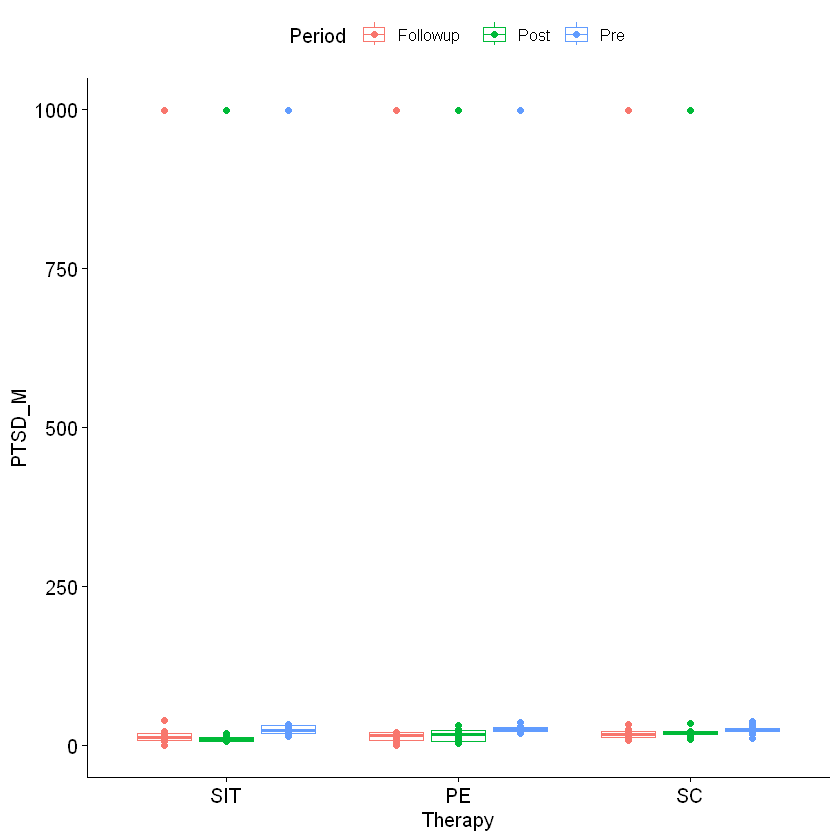

In [618]:
ggboxplot(PTSD_data_r, x="Therapy", y="PTSD_M", color="Period", add="point")

In [619]:
PTSD_data_r %>% group_by(Therapy,Period) %>% identify_outliers(PTSD_M)

Therapy,Period,PTSD_M,ID,is.outlier,is.extreme
<chr>,<chr>,<dbl>,<dbl>,<lgl>,<lgl>
PE,Followup,999,23,TRUE,TRUE
PE,Followup,999,24,TRUE,TRUE
PE,Post,999,17,TRUE,TRUE
PE,Post,999,20,TRUE,TRUE
PE,Pre,999,17,TRUE,TRUE
SC,Followup,999,38,TRUE,TRUE
SC,Followup,999,41,TRUE,TRUE
SC,Post,999,33,TRUE,TRUE
SC,Post,35,37,TRUE,TRUE


In [620]:
PTSD_data_r <- PTSD_data_r[-c(4,26,37,41,47,62,65,83,84,108,112,116,128,131),]

PTSD_data_r

,Therapy,Period,PTSD_M,ID
,<chr>,<chr>,<dbl>,<dbl>
1,SIT,Pre,19,1
2,SIT,Pre,28,2
3,SIT,Pre,18,3
5,SIT,Pre,21,5
6,SIT,Pre,24,6
7,SIT,Pre,26,7
8,SIT,Pre,15,8
9,SIT,Pre,18,9
10,SIT,Pre,34,10


با حذف آوتلایرها تقریبا توزیعی مشابه توزیع اصلی پیدا میکنیم و از این بعد همانطور که می بینیم نتایج یکسان است

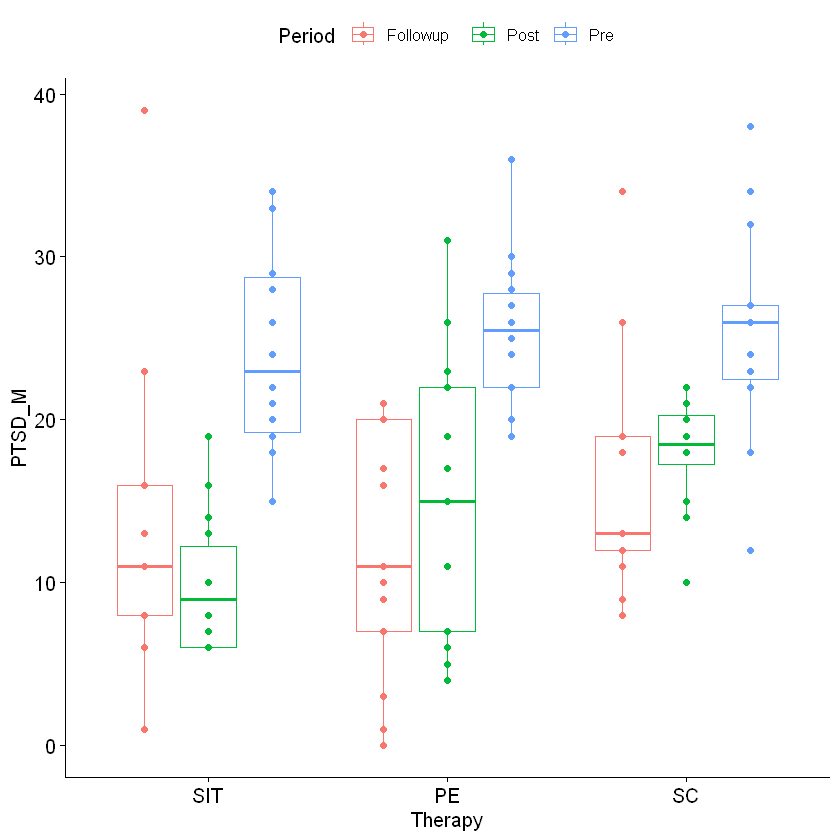

In [621]:
ggboxplot(PTSD_data_r, x="Therapy", y="PTSD_M", color="Period", add="point")

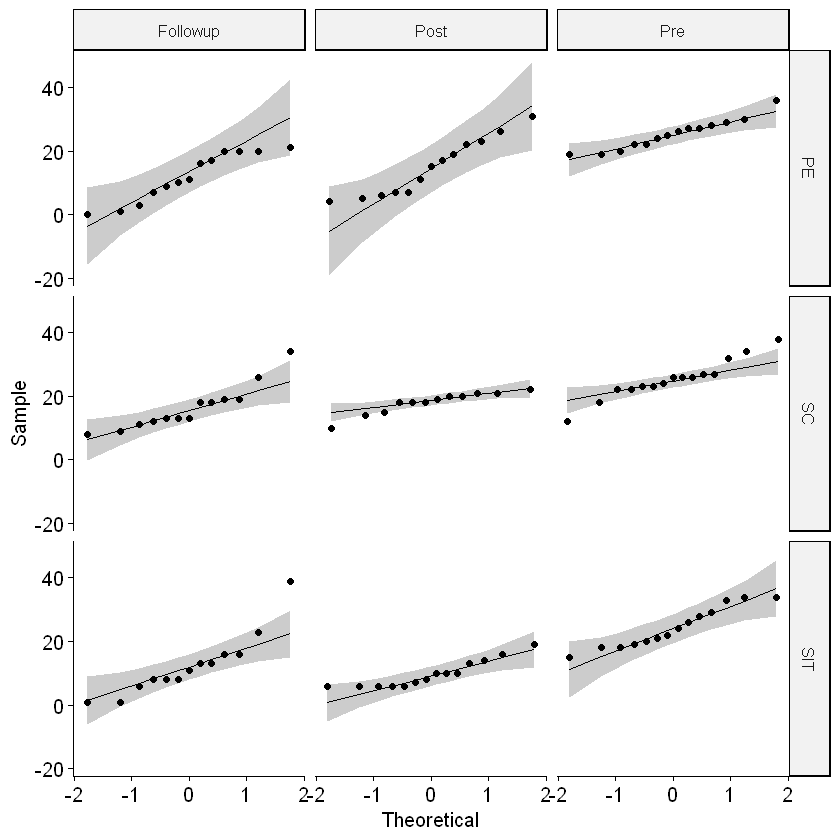

In [622]:
ggqqplot(PTSD_data_r,"PTSD_M") + facet_grid(Therapy ~ Period)

In [623]:
PTSD_data_r %>% group_by(Therapy,Period) %>% shapiro_test(PTSD_M)

Therapy,Period,variable,statistic,p
<chr>,<chr>,<chr>,<dbl>,<dbl>
PE,Followup,PTSD_M,0.9009280,0.13770819
PE,Post,PTSD_M,0.9264555,0.30608292
PE,Pre,PTSD_M,0.9495808,0.55421544
SC,Followup,PTSD_M,0.8800990,0.07153068
SC,Post,PTSD_M,0.8897696,0.11703650
SC,Pre,PTSD_M,0.9565449,0.63261887
SIT,Followup,PTSD_M,0.8628778,0.04204853
SIT,Post,PTSD_M,0.8526016,0.02409691
SIT,Pre,PTSD_M,0.9260857,0.26868946


فقط به ازای یک حالت مقار پی کمتر از 5 صدم داریم

In [624]:
PTSD_data_r %>% levene_test(PTSD_M ~ Therapy*Period)

df1,df2,statistic,p
<int>,<int>,<dbl>,<dbl>
8,112,1.953125,0.05892031


بر خلاف بالا همگنی واریانس ها برقرار است

In [625]:
model_r <- PTSD_M ~ Therapy + Period + Therapy:Period

In [626]:
Rm_results_r = anova_test(data = PTSD_data_r,dv = PTSD_M, wid = ID, within = c(Period,Therapy),formula = model_r)
Rm_results_r

,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,Therapy,2,112,3.890,2.30e-02,*,0.065
2,Period,2,112,36.455,6.41e-13,*,0.394
3,Therapy:Period,4,112,1.319,2.67e-01,,0.045


In [627]:
summary(Rm_results_r)

    Effect               DFn             DFd            F         
 Length:3           Min.   :2.000   Min.   :112   Min.   : 1.319  
 Class :character   1st Qu.:2.000   1st Qu.:112   1st Qu.: 2.604  
 Mode  :character   Median :2.000   Median :112   Median : 3.890  
                    Mean   :2.667   Mean   :112   Mean   :13.888  
                    3rd Qu.:3.000   3rd Qu.:112   3rd Qu.:20.172  
                    Max.   :4.000   Max.   :112   Max.   :36.455  
       p              p<.05                ges        
 Min.   :0.00000   Length:3           Min.   :0.0450  
 1st Qu.:0.01150   Class :character   1st Qu.:0.0550  
 Median :0.02300   Mode  :character   Median :0.0650  
 Mean   :0.09667                      Mean   :0.1680  
 3rd Qu.:0.14500                      3rd Qu.:0.2295  
 Max.   :0.26700                      Max.   :0.3940  

In [628]:
Mixed_results_r = anova_test(data = PTSD_data_r,dv = PTSD_M, wid = ID, between = Therapy, within = Period,formula = model_r)
Mixed_results_r

,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,Therapy,2,112,3.890,2.30e-02,*,0.065
2,Period,2,112,36.455,6.41e-13,*,0.394
3,Therapy:Period,4,112,1.319,2.67e-01,,0.045


In [629]:
summary(Mixed_results_r)

    Effect               DFn             DFd            F         
 Length:3           Min.   :2.000   Min.   :112   Min.   : 1.319  
 Class :character   1st Qu.:2.000   1st Qu.:112   1st Qu.: 2.604  
 Mode  :character   Median :2.000   Median :112   Median : 3.890  
                    Mean   :2.667   Mean   :112   Mean   :13.888  
                    3rd Qu.:3.000   3rd Qu.:112   3rd Qu.:20.172  
                    Max.   :4.000   Max.   :112   Max.   :36.455  
       p              p<.05                ges        
 Min.   :0.00000   Length:3           Min.   :0.0450  
 1st Qu.:0.01150   Class :character   1st Qu.:0.0550  
 Median :0.02300   Mode  :character   Median :0.0650  
 Mean   :0.09667                      Mean   :0.1680  
 3rd Qu.:0.14500                      3rd Qu.:0.2295  
 Max.   :0.26700                      Max.   :0.3940  

In [630]:
PTSD_data_r %>% group_by(Therapy) %>% anova_test(dv = PTSD_M, wid = ID, within = Period,formula = PTSD_M ~ Period ) %>% adjust_pvalue(method="bonferroni")


Therapy,Effect,DFn,DFd,F,p,p<.05,ges,p.adj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
PE,Period,2,37,12.758,6.11e-05,*,0.408,1.833e-04
SC,Period,2,37,9.044,6.34e-04,*,0.328,1.902e-03
SIT,Period,2,38,16.071,8.75e-06,*,0.458,2.625e-05


In [632]:
PTSD_data_r %>% group_by(Therapy) %>% pairwise_t_test(PTSD_M ~ Period, paired=TRUE,p.adjust.method = "bonferroni" )

,Therapy,.y.,group1,group2,n1,n2,p,p.signif,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>
1,PE,PTSD_M,Followup,Post,13,13,3.11e-01,ns,9.34e-01,ns
2,PE,PTSD_M,Followup,Pre,13,14,2.78e-05,****,8.35e-05,****
3,PE,PTSD_M,Post,Pre,13,14,6.33e-04,***,1.90e-03,**
4,SC,PTSD_M,Followup,Post,13,12,5.03e-01,ns,1.00e+00,ns
5,SC,PTSD_M,Followup,Pre,13,15,3.26e-04,***,9.78e-04,***
6,SC,PTSD_M,Post,Pre,12,15,3.00e-03,**,9.00e-03,**
7,SIT,PTSD_M,Followup,Post,13,14,3.28e-01,ns,9.83e-01,ns
8,SIT,PTSD_M,Followup,Pre,13,14,1.30e-04,***,3.90e-04,***
9,SIT,PTSD_M,Post,Pre,14,14,4.42e-06,****,1.33e-05,****


In [636]:
PTSD_data_r %>% group_by(Period) %>% anova_test(dv = PTSD_M, wid = ID, within = Therapy,formula = PTSD_M ~ Therapy ) %>% adjust_pvalue(method="bonferroni")


Period,Effect,DFn,DFd,F,p,p<.05,ges,p.adj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Followup,Therapy,2,36,1.079,0.351,,0.057,1.000
Post,Therapy,2,36,6.126,0.005,*,0.254,0.015
Pre,Therapy,2,40,0.125,0.883,,0.006,1.000


In [634]:
PTSD_data %>% group_by(Period) %>% pairwise_t_test(PTSD_M ~ Therapy, paired=TRUE,p.adjust.method = "bonferroni" )

,Period,.y.,group1,group2,n1,n2,p,p.signif,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>
1,Followup,PTSD_M,PE,SC,15,15,0.039500,*,0.11800,ns
2,Followup,PTSD_M,PE,SIT,15,15,0.622000,ns,1.00000,ns
3,Followup,PTSD_M,SC,SIT,15,15,0.111000,ns,0.33300,ns
4,Post,PTSD_M,PE,SC,15,14,0.056100,ns,0.16800,ns
5,Post,PTSD_M,PE,SIT,15,15,0.058000,ns,0.17400,ns
6,Post,PTSD_M,SC,SIT,14,15,0.000369,***,0.00111,**
7,Pre,PTSD_M,PE,SC,15,15,0.875000,ns,1.00000,ns
8,Pre,PTSD_M,PE,SIT,15,15,0.730000,ns,1.00000,ns
9,Pre,PTSD_M,SC,SIT,15,15,0.615000,ns,1.00000,ns


### Now analyze the new data using a mixed models approach withan appropriate form for the covariance matrix. How do those results differ from the results you found above?

In [638]:
mixed_model_r <- lme(
  fixed = PTSD_M ~ Therapy * Period,
  random = ~1 | ID,
  data = PTSD_data_r,
  correlation = corAR1(form = ~1 | ID),
  method = "REML"
)
summary(mixed_model_r)


Linear mixed-effects model fit by REML
  Data: PTSD_data_r 
      AIC     BIC    logLik
  780.527 813.149 -378.2635

Random effects:
 Formula: ~1 | ID
        (Intercept) Residual
StdDev: 0.001359459 6.961953

Correlation Structure: AR(1)
 Formula: ~1 | ID 
 Parameter estimate(s):
      Phi 
0.6103026 
Fixed effects:  PTSD_M ~ Therapy * Period 
                     Value Std.Error DF   t-value p-value
(Intercept)      17.681910 0.8832886 70 20.018270  0.0000
Therapy1         -0.411633 1.2494138 42 -0.329461  0.7434
Therapy2          2.680379 1.2528028 42  2.139506  0.0383
Period1          -4.335942 0.6628518 70 -6.541344  0.0000
Period2          -2.993375 0.5191360 70 -5.766071  0.0000
Therapy1:Period1 -2.003029 0.9438645 70 -2.122157  0.0374
Therapy2:Period1  0.643473 0.9275509 70  0.693733  0.4901
Therapy1:Period2  0.937080 0.7356396 70  1.273830  0.2069
Therapy2:Period2  1.880089 0.7453104 70  2.522559  0.0139
 Correlation: 
                 (Intr) Thrpy1 Thrpy2 Perid1 Perid2 Th1:P1

In [639]:
anova(mixed_model_r)

,numDF,denDF,F-value,p-value
,<int>,<dbl>,<dbl>,<dbl>
(Intercept),1,70,450.458117,0.000000e+00
Therapy,2,42,2.006589,1.471324e-01
Period,2,70,65.767045,1.110223e-16
Therapy:Period,4,70,5.090706,1.168282e-03


In [663]:
pairwise_results_r <- emmeans(mixed_model_r, ~ Therapy)
pairwise_contrasts_r <- contrast(pairwise_results_r, method = "pairwise")
pairwise_contrasts_r

NOTE: Results may be misleading due to involvement in interactions



 contrast estimate   SE df t.ratio p.value
 PE - SC     -3.09 2.17 42  -1.425  0.3376
 PE - SIT     1.86 2.16 42   0.861  0.6676
 SC - SIT     4.95 2.16 42   2.288  0.0686

Results are averaged over the levels of: Period 
Degrees-of-freedom method: containment 
P value adjustment: tukey method for comparing a family of 3 estimates 

تفاوت مشهودی بین نتایج روش های درمان نیست

In [641]:
pairwise_results_r <- emmeans(mixed_model_r, ~ Period)
pairwise_contrasts_r <- contrast(pairwise_results_r, method = "pairwise")
pairwise_contrasts_r

NOTE: Results may be misleading due to involvement in interactions



 contrast        estimate    SE df t.ratio p.value
 Followup - Post    -1.34 1.000 70  -1.343  0.3764
 Followup - Pre    -11.67 1.203 70  -9.699  <.0001
 Post - Pre        -10.32 0.968 70 -10.664  <.0001

Results are averaged over the levels of: Therapy 
Degrees-of-freedom method: containment 
P value adjustment: tukey method for comparing a family of 3 estimates 

نتایج در این حالت هم همسان با نتایج فوق است